In [1]:
import os 

import numpy as np
import scipy.stats as sps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import sys, os
sys.path += [os.path.abspath(os.pardir + '/code')]
print(sys.path)

from experiment import init_random_state, BanditLoopExperiment, get_ts_model

sns.set(font_scale=1.2, palette='tab20') 

['/home/anton/Desktop/m1p/2021-Project-74/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/anton/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/home/anton/.local/lib/python3.8/site-packages/IPython/extensions', '/home/anton/.ipython', '/home/anton/Desktop/m1p/2021-Project-74/code']


In [2]:
p = 0.9
Q = 1
ws = [1,4,10]
b = 0.0

T = 2000
M = 10
l = 4
interests, responses = [], []


repeats = 30
res = {}
for w in ws:
    sum_interests = []
    for i in range(repeats):
        init_random_state(i)

        bandit = lambda: get_ts_model(M=M, l=l)
        exp = BanditLoopExperiment(bandit, "TS bandit")
        exp.prepare(w=w, Q=Q, p=p, b=b)
        exp.run_experiment(T=T)

        results = exp.get_as_np()
        interests = results.interest
        
        sum_interests.append(np.linalg.norm(interests - interests[0], axis=1)**2)

    res[w] = sum_interests

In [3]:
for w in ws:
    res[w] = np.concatenate(res[w])

In [4]:
ni = []
www = []
ts = []
for w in ws:
    ni.append(res[w])
    www.append(np.ones(repeats*T)*w)
    ts.append(np.tile(np.arange(1, T+1), repeats)) 
    
ni = np.concatenate(ni).reshape(1,-1)
www = np.concatenate(www).reshape(1,-1)
ts = np.concatenate(ts).reshape(1,-1)

In [5]:
data = pd.DataFrame(np.vstack([ni, www, ts]).T, columns=['Norm interests', 'w', 't']) 
data

,Norm interests,w,t
0,0.000000,1.0,1.0
1,0.000149,1.0,2.0
2,0.000100,1.0,3.0
3,0.000325,1.0,4.0
4,0.000225,1.0,5.0
...,...,...,...
179995,1.440882,10.0,1996.0
179996,1.464860,10.0,1997.0
179997,1.473351,10.0,1998.0
179998,1.460710,10.0,1999.0


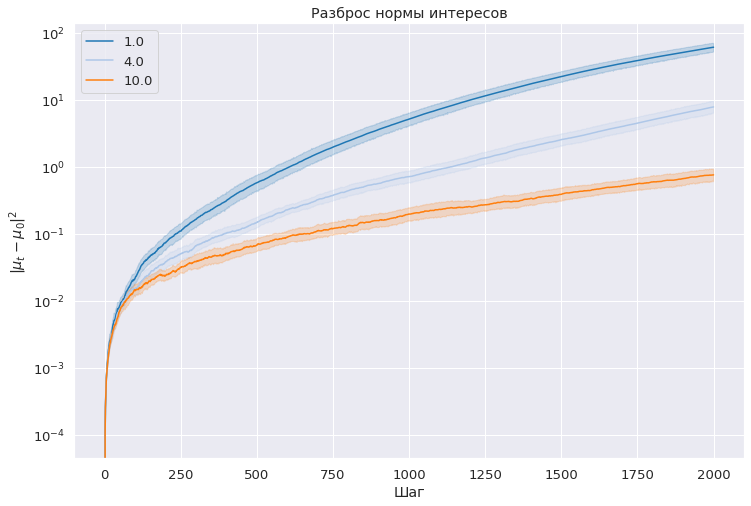

In [6]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=data, x='t', y='Norm interests', hue='w', palette='tab20')
plt.yscale('log')
plt.ylabel(r'$\|\mu_t - \mu_0 \|^2$')
plt.title('Разброс нормы интересов')
plt.legend()
plt.xlabel('Шаг')
plt.savefig('var_norm_interest.pdf')